In [1]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xgboost

In [3]:
from sklearn import preprocessing, model_selection, linear_model, tree, ensemble,metrics

In [4]:
train = pd.read_csv("E:\\Hackthon\\Big Mart Sales Prediction\\train_v9rqX0R.csv")
test = pd.read_csv("E:\\Hackthon\\Big Mart Sales Prediction\\test_AbJTz2l.csv")

train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
data = pd.concat([train,test],axis = 0)
data.shape

(14204, 12)

In [7]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [8]:
data.drop('Item_Identifier',axis = 1, inplace = True)
data.shape

(14204, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 11 columns):
Item_Fat_Content             14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 1.3+ MB


In [10]:
data.dtypes

Item_Fat_Content              object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
dtype: object

In [11]:
data.isnull().sum()

Item_Fat_Content                0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [12]:
data.isnull().sum()*100/len(data)

Item_Fat_Content              0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            39.995776
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  17.171219
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  28.273726
Outlet_Type                   0.000000
dtype: float64

In [13]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [14]:
for col in data.columns:
    print(col, ':' , len(data[col].unique()),'label')

Item_Fat_Content : 5 label
Item_MRP : 8052 label
Item_Outlet_Sales : 3494 label
Item_Type : 16 label
Item_Visibility : 13006 label
Item_Weight : 416 label
Outlet_Establishment_Year : 9 label
Outlet_Identifier : 10 label
Outlet_Location_Type : 3 label
Outlet_Size : 4 label
Outlet_Type : 4 label


## Preparing Data

In [15]:
data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].fillna(f"{data['Item_Outlet_Sales'].median()}")
data['Item_Weight'] = data['Item_Weight'].fillna(f"{data['Item_Weight'].median()}")
data['Outlet_Size'] = data['Outlet_Size'].fillna(f"{data['Outlet_Size'].mode()}")

In [16]:
for col in data.select_dtypes(include='object'):
    if len(data[col].unique()) <20:
        print(f"\n Columns Name : {col}\n",data[col].unique())


 Columns Name : Item_Fat_Content
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

 Columns Name : Item_Type
 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

 Columns Name : Outlet_Identifier
 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

 Columns Name : Outlet_Location_Type
 ['Tier 1' 'Tier 3' 'Tier 2']

 Columns Name : Outlet_Size
 ['Medium' '0    Medium\ndtype: object' 'High' 'Small']

 Columns Name : Outlet_Type
 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [17]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF' : 'Low Fat' ,'reg' : 'Regular' })
data['Outlet_Size'] = data['Outlet_Size'].replace({'0    Medium\ndtype: object' : 'Medium'})

In [18]:
data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'].astype('float64')
data['Item_Weight'] = data['Item_Weight'].astype('float64')

# EDA

In [19]:
sns.set_style('darkgrid')

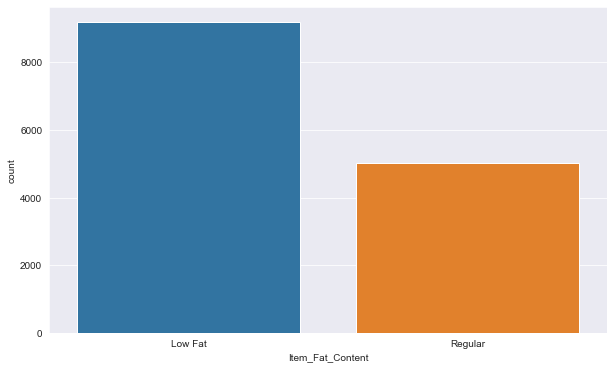

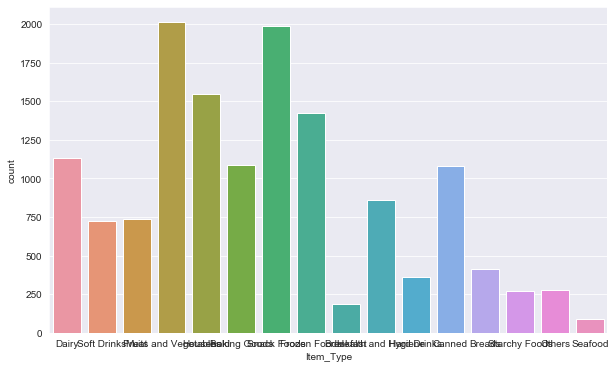

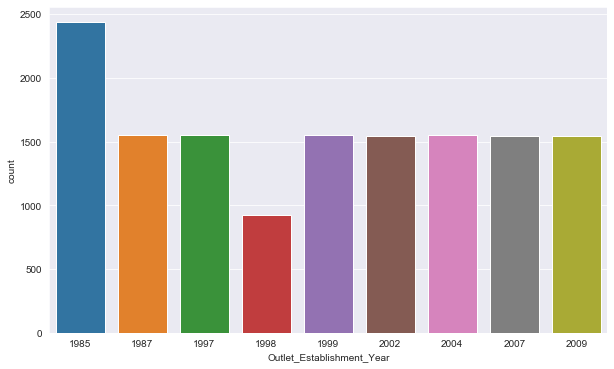

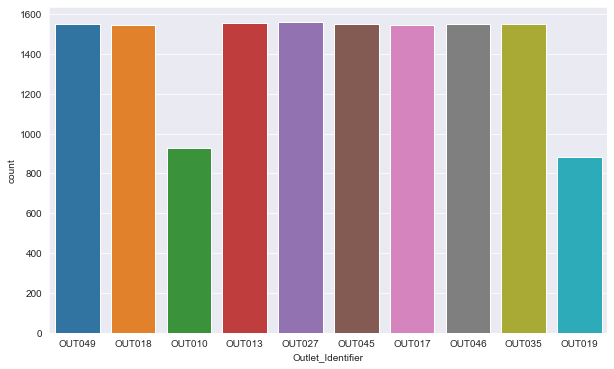

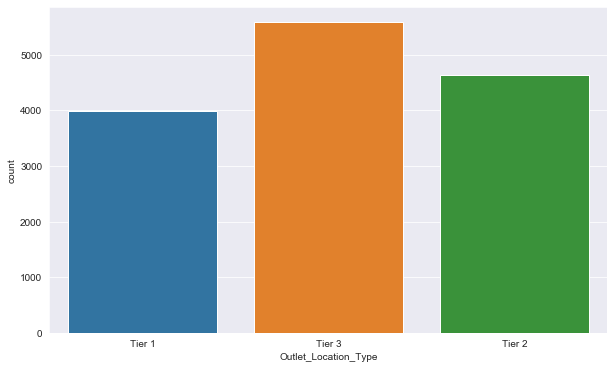

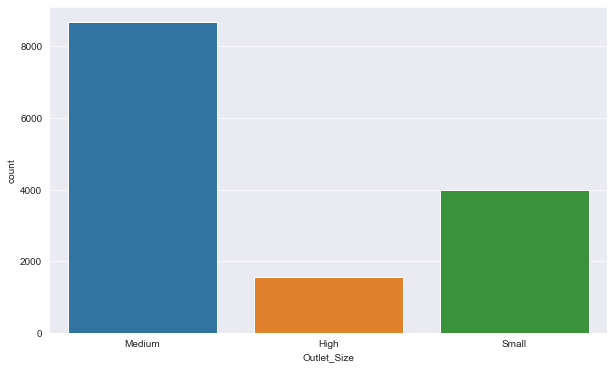

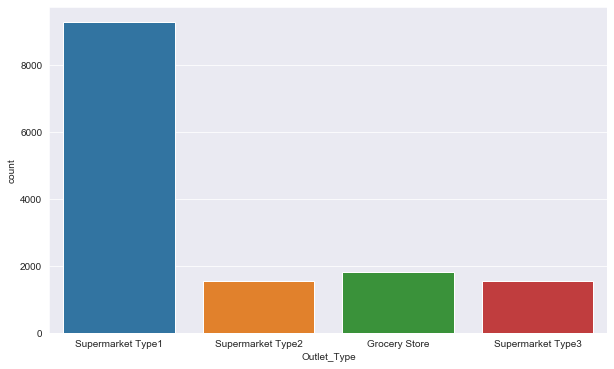

In [20]:
for col in data.columns:
    if len(data[col].unique()) < 20:
        plt.figure(figsize=(10,6))
        sns.countplot(data[col])
        plt.show()

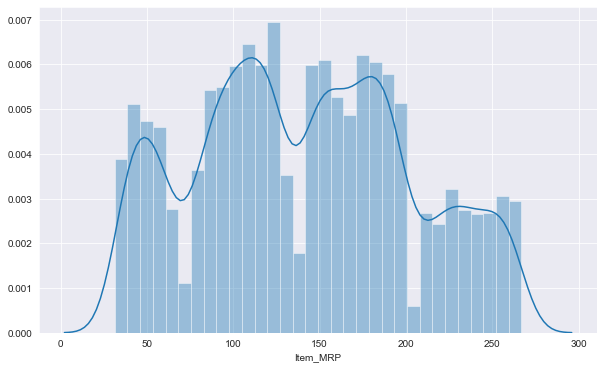

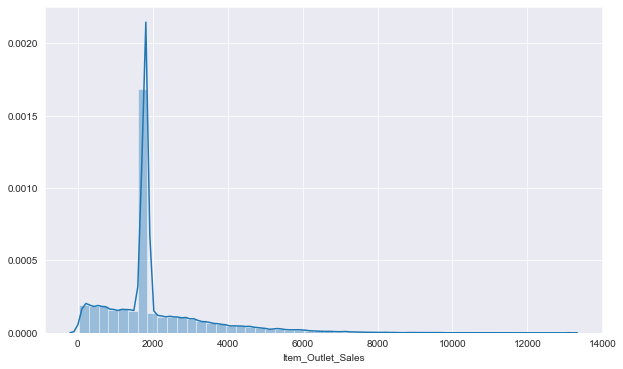

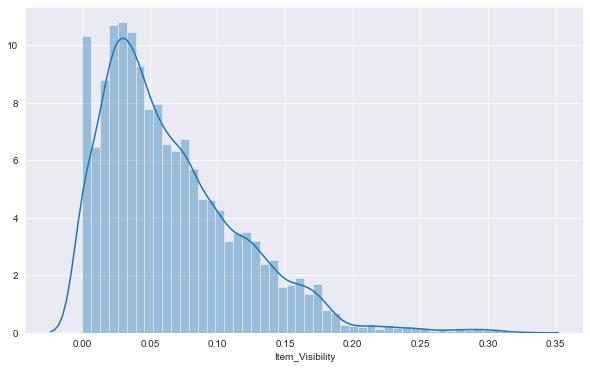

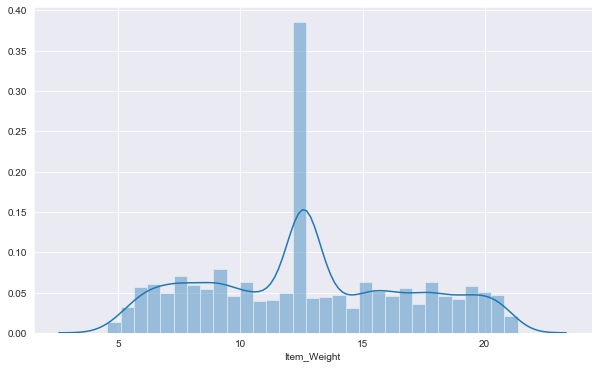

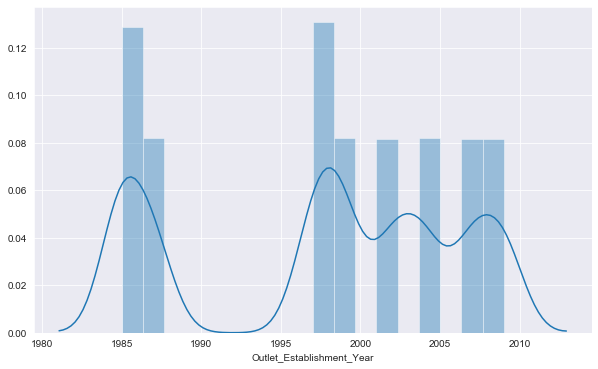

In [21]:
for col in data.select_dtypes(exclude='object'):
    plt.figure(figsize=(10,6))
    sns.distplot(data[col])
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247034E9748>,
      dtype=object)

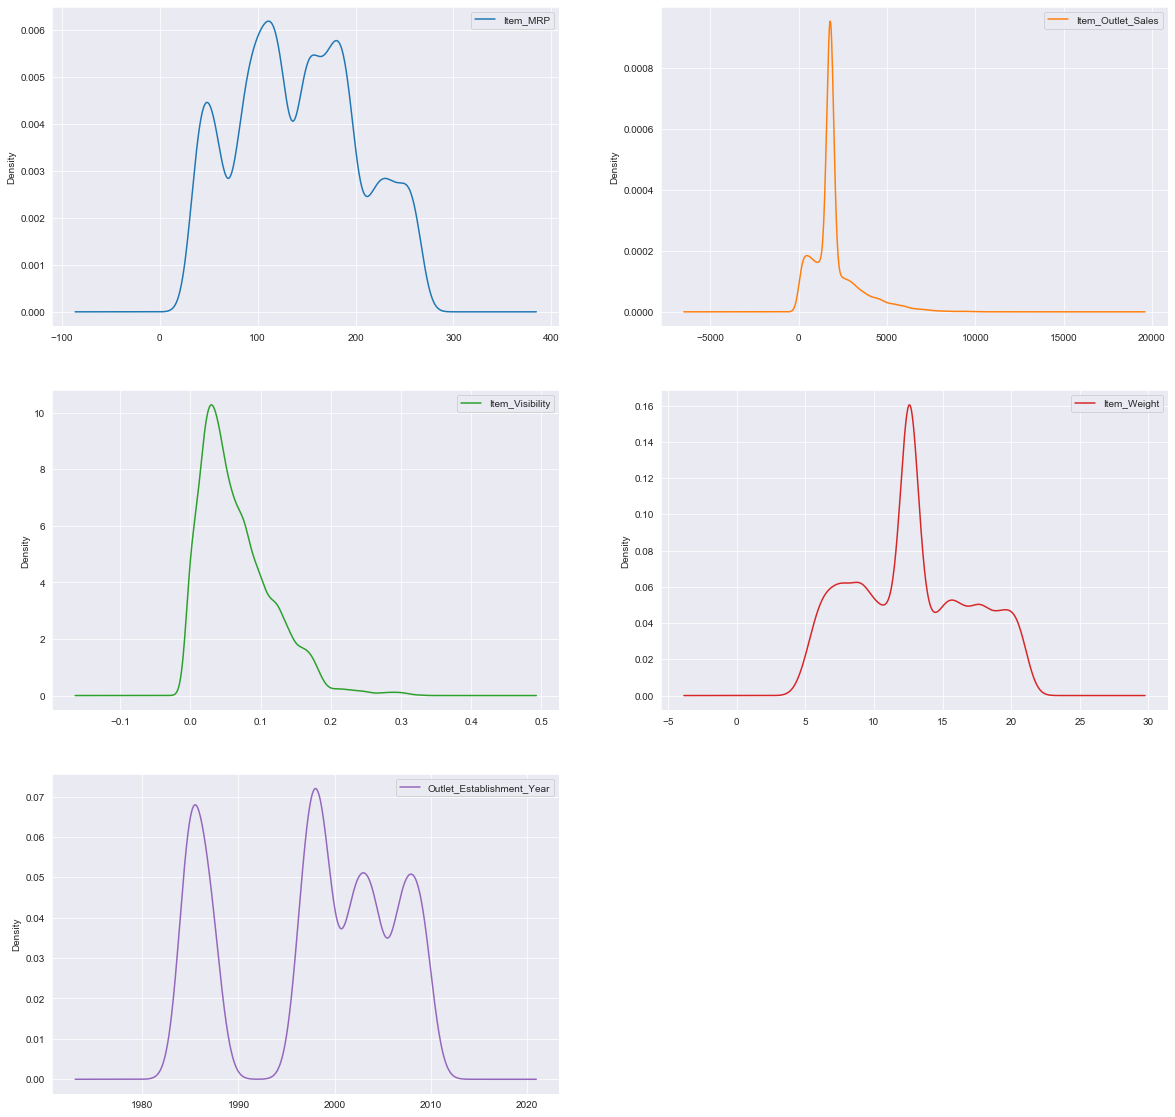

In [22]:
data.plot(kind = 'density', subplots = True, layout = (3,2), sharex = False, figsize = (20,20))

## Label Data

In [23]:
leb = preprocessing.LabelEncoder()

In [24]:
for col in data.select_dtypes(include='object'):
    data[col] = leb.fit_transform(data[col])
    
data.head()

,Item_Fat_Content,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,0,249.8092,3735.1380,4,0.016047,9.30,1999,9,0,1,1
1,1,48.2692,443.4228,14,0.019278,5.92,2009,3,2,1,2
2,0,141.6180,2097.2700,10,0.016760,17.50,1999,9,0,1,1
3,1,182.0950,732.3800,6,0.000000,19.20,1998,0,2,1,0
4,0,53.8614,994.7052,9,0.000000,8.93,1987,1,2,0,1


## Normalization Data

In [25]:
norm = preprocessing.MinMaxScaler()
norm_data = pd.DataFrame(norm.fit_transform(data), columns=['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'])

In [26]:
stand_data = preprocessing.StandardScaler()
stand_data = pd.DataFrame(stand_data.fit_transform(data), columns=['Item_Fat_Content', 'Item_MRP', 'Item_Outlet_Sales', 'Item_Type',
       'Item_Visibility', 'Item_Weight', 'Outlet_Establishment_Year',
       'Outlet_Identifier', 'Outlet_Location_Type', 'Outlet_Size',
       'Outlet_Type'])

## Extract Data

In [65]:
train = data[:len(train)]
test = data[len(train):]

test = test.drop('Item_Outlet_Sales',axis = 1)

train.shape, test.shape

((8523, 11), (5681, 10))

In [66]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales'] 

In [67]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = .30)

In [68]:
X_train.shape, X_test.shape

((5966, 10), (2557, 10))

In [69]:
y_train.shape, y_test.shape

((5966,), (2557,))

# Build Model

In [70]:
model_DT = tree.DecisionTreeRegressor()
model_DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [71]:
y_pred_DT = model_DT.predict(X_test)
MSE_DT = metrics.mean_squared_error(y_test,y_pred_DT)
RMSE_DT = np.sqrt(MSE_DT)
MAE_DT = metrics.mean_absolute_error(y_test,y_pred_DT)
print("Root Mean Squre Error : \n",RMSE_DT ,"\nMean Squre Error : \n", MSE_DT,
      "\nMean Absolute Error : \n", MAE_DT)

Root Mean Squre Error : 
 1563.3697830291856 
Mean Squre Error : 
 2444125.078488723 
Mean Absolute Error : 
 1077.6729413375049


## RandomForestRegressor

In [72]:
model_RFR = ensemble.RandomForestRegressor()
model_RFR.fit(X_train,y_train)
y_pred_RFR = model_RFR.predict(X_test)
MSE_RFR = metrics.mean_squared_error(y_test,y_pred_RFR)
RMSE_RFR = np.sqrt(MSE_RFR)
MAE_RFR = metrics.mean_absolute_error(y_test,y_pred_RFR)

In [73]:
print("Root Mean Squre Error : \n",RMSE_RFR ,"\n Mean Squre Error : \n", MSE_RFR, "\nMean Absolute Error : \n", MAE_RFR)

Root Mean Squre Error : 
 1171.7398815391582 
 Mean Squre Error : 
 1372974.3499894007 
Mean Absolute Error : 
 821.4526091748141


## GradientBoostingRegressor

In [74]:
model_xgb = ensemble.GradientBoostingRegressor()
model_xgb.fit(X_train,y_train)
y_pred_xgb = model_xgb.predict(X_test)
MSE_xgb = metrics.mean_squared_error(y_test,y_pred_xgb)
RMSE_xgb = np.sqrt(MSE_xgb)
MAE_xgb = metrics.mean_absolute_error(y_test,y_pred_xgb)

In [75]:
print("Root Mean Squre Error : \n",RMSE_xgb, "\nMean Squre Error : \n", MSE_xgb, "\nMean Absolute Error : \n", MAE_xgb)

Root Mean Squre Error : 
 1099.7476679572112 
Mean Squre Error : 
 1209444.9331773245 
Mean Absolute Error : 
 760.4512217453961


## XGBRegressor

In [76]:
model_XGBR =xgboost.XGBRegressor()
model_XGBR.fit(X_train,y_train)
y_pred_XGBR = model_XGBR.predict(X_test)
MSE_XGBR = metrics.mean_squared_error(y_test,y_pred_XGBR)
RMSE_XGBR = np.sqrt(MSE_XGBR)
MAE_XGBR = metrics.mean_absolute_error(y_test,y_pred_XGBR)

[09:56:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [77]:
print("Root Mean Squre Error : \n",RMSE_XGBR, "\nMean Squre Error : \n", MSE_XGBR, "\nMean Absolute Error : \n", MAE_XGBR)

Root Mean Squre Error : 
 1095.1630952354126 
Mean Squre Error : 
 1199382.2051656095 
Mean Absolute Error : 
 757.3246461955188


# Optimization

## Randomized SearchCV

In [78]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node


# Create the random grid
param = {   'max_depth': range (2, 10, 1),
            'n_estimators': n_estimators,
            'learning_rate': [.0001, 0.001, .01, 0.20, 0.30, 0.40, 0.50,0.60]
}
print(param)

{'max_depth': range(2, 10), 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.0001, 0.001, 0.01, 0.2, 0.3, 0.4, 0.5, 0.6]}


In [79]:
model_XGBR = xgboost.XGBRegressor()
rand_search=RandomizedSearchCV(estimator=model_XGBR,param_distributions=param,n_iter=100,cv=2,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rand_search.fit(X_train,y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.2min finished


[10:04:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=2, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [80]:
rand_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [81]:
rand_search.best_params_

{'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01}

In [82]:
rand_search.best_score_

0.6001607880802784

In [97]:
model_XGBR =xgboost.XGBRegressor( n_estimators=400, max_depth=3,  learning_rate=0.01)
model_XGBR.fit(X_train,y_train)

[10:11:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [98]:
y_pred_XGBR = model_XGBR.predict(X_test)
MSE_XGBR = metrics.mean_squared_error(y_test,y_pred_XGBR)
RMSE_XGBR = np.sqrt(MSE_XGBR)
MAE_XGBR = metrics.mean_absolute_error(y_test,y_pred_XGBR)

In [99]:
print("Root Mean Squre Error : \n",RMSE_XGBR, "\nMean Squre Error : \n", MSE_XGBR, "\nMean Absolute Error : \n", MAE_XGBR)

Root Mean Squre Error : 
 1094.0283539240008 
Mean Squre Error : 
 1196898.039189659 
Mean Absolute Error : 
 755.6334559693814


## Output

In [87]:
out = pd.read_csv("E:\\Hackthon\\Big Mart Sales Prediction\\sample_submission_8RXa3c6.csv")
out.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [88]:
predicted = model_XGBR.predict(test)
predicted

array([1633.6495, 1358.8535,  625.9681, ..., 1908.3705, 3540.5066,
       1305.2235], dtype=float32)

In [89]:
out['Item_Outlet_Sales'] = predicted

In [90]:
out.to_csv("E:\sample_submission.csv")